In [53]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [54]:
#Data taken from 2020 census but as a csv
#Read the csv

aqi_data = "C:/Users/emanu/repos/Data Project Github/World-Power/Resources/AQI data from EPA.csv"
ppbycounty = "C:/Users/emanu/repos/Data Project Github/World-Power/Output/powerplants_by_county.csv"

In [55]:
#Read the CSV for all the state powerplants

#Select only useful columns

aqidf = pd.read_csv(aqi_data)
ppbycountydf = pd.read_csv(ppbycounty)

aqidf.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2017,270,241,28,1,0,0,0,108,51,36,0,0,206,64,0
1,Alabama,Clay,2017,118,104,14,0,0,0,0,66,52,30,0,0,0,118,0
2,Alabama,Colbert,2017,283,265,18,0,0,0,0,63,48,37,0,0,218,65,0
3,Alabama,DeKalb,2017,359,329,30,0,0,0,0,80,50,39,0,0,315,44,0
4,Alabama,Elmore,2017,226,221,5,0,0,0,0,58,45,35,0,0,226,0,0


In [56]:
ppbycountydf


,Unnamed: 0,County,num_solar,num_gas,num_oil,num_hydro,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other
0,0,"Rockland County, New York",2,4,2,0,0,0,0,0,0,0,0,0,0
1,1,"Lee County, North Carolina",8,0,0,0,0,0,0,0,0,0,0,0,0
2,2,"Yadkin County, North Carolina",4,0,0,0,0,0,0,0,0,0,0,0,0
3,3,"Mercer County, New Jersey",13,5,0,0,0,0,0,1,0,0,0,0,0
4,4,"Norfolk County, Massachusetts",14,7,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2020,"Yankton County, South Dakota",0,1,0,0,0,0,0,0,0,0,0,0,0
2021,2021,"Coweta County, Georgia",0,1,0,0,0,0,0,0,0,0,0,0,0
2022,2022,"Stephens County, Georgia",0,0,0,1,0,0,0,0,0,0,0,0,0
2023,2023,"York County, Virginia",0,0,1,0,0,0,0,0,0,0,0,0,0


In [57]:
#inserting state and county data merged into one column

aqidf.insert(2,"County, State","")

aqidf

,State,County,"County, State",Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,,2017,270,241,28,1,0,0,0,108,51,36,0,0,206,64,0
1,Alabama,Clay,,2017,118,104,14,0,0,0,0,66,52,30,0,0,0,118,0
2,Alabama,Colbert,,2017,283,265,18,0,0,0,0,63,48,37,0,0,218,65,0
3,Alabama,DeKalb,,2017,359,329,30,0,0,0,0,80,50,39,0,0,315,44,0
4,Alabama,Elmore,,2017,226,221,5,0,0,0,0,58,45,35,0,0,226,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Wyoming,Sublette,,2017,365,228,129,8,0,0,0,150,71,48,0,0,345,20,0
1025,Wyoming,Sweetwater,,2017,365,260,100,2,2,1,0,264,65,46,0,1,321,7,36
1026,Wyoming,Teton,,2017,365,299,65,1,0,0,0,118,59,44,0,0,341,24,0
1027,Wyoming,Uinta,,2017,365,310,53,1,0,0,1,696,54,44,0,3,348,0,14


In [58]:
aqidf.head()


,State,County,"County, State",Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,,2017,270,241,28,1,0,0,0,108,51,36,0,0,206,64,0
1,Alabama,Clay,,2017,118,104,14,0,0,0,0,66,52,30,0,0,0,118,0
2,Alabama,Colbert,,2017,283,265,18,0,0,0,0,63,48,37,0,0,218,65,0
3,Alabama,DeKalb,,2017,359,329,30,0,0,0,0,80,50,39,0,0,315,44,0
4,Alabama,Elmore,,2017,226,221,5,0,0,0,0,58,45,35,0,0,226,0,0


In [59]:
#created a new column for county/state for the AQI data

aqidf["County, State"] = aqidf["County"]  + " County, "+ aqidf["State"]


aqidf

,State,County,"County, State",Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,"Baldwin County, Alabama",2017,270,241,28,1,0,0,0,108,51,36,0,0,206,64,0
1,Alabama,Clay,"Clay County, Alabama",2017,118,104,14,0,0,0,0,66,52,30,0,0,0,118,0
2,Alabama,Colbert,"Colbert County, Alabama",2017,283,265,18,0,0,0,0,63,48,37,0,0,218,65,0
3,Alabama,DeKalb,"DeKalb County, Alabama",2017,359,329,30,0,0,0,0,80,50,39,0,0,315,44,0
4,Alabama,Elmore,"Elmore County, Alabama",2017,226,221,5,0,0,0,0,58,45,35,0,0,226,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Wyoming,Sublette,"Sublette County, Wyoming",2017,365,228,129,8,0,0,0,150,71,48,0,0,345,20,0
1025,Wyoming,Sweetwater,"Sweetwater County, Wyoming",2017,365,260,100,2,2,1,0,264,65,46,0,1,321,7,36
1026,Wyoming,Teton,"Teton County, Wyoming",2017,365,299,65,1,0,0,0,118,59,44,0,0,341,24,0
1027,Wyoming,Uinta,"Uinta County, Wyoming",2017,365,310,53,1,0,0,1,696,54,44,0,3,348,0,14


In [60]:
# creating new column for AQ percentage
aqidf.insert(5, "% Poor Air Quality","")

aqidf


,State,County,"County, State",Year,Days with AQI,% Poor Air Quality,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,"Baldwin County, Alabama",2017,270,,241,28,1,0,0,0,108,51,36,0,0,206,64,0
1,Alabama,Clay,"Clay County, Alabama",2017,118,,104,14,0,0,0,0,66,52,30,0,0,0,118,0
2,Alabama,Colbert,"Colbert County, Alabama",2017,283,,265,18,0,0,0,0,63,48,37,0,0,218,65,0
3,Alabama,DeKalb,"DeKalb County, Alabama",2017,359,,329,30,0,0,0,0,80,50,39,0,0,315,44,0
4,Alabama,Elmore,"Elmore County, Alabama",2017,226,,221,5,0,0,0,0,58,45,35,0,0,226,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,Wyoming,Sublette,"Sublette County, Wyoming",2017,365,,228,129,8,0,0,0,150,71,48,0,0,345,20,0
1025,Wyoming,Sweetwater,"Sweetwater County, Wyoming",2017,365,,260,100,2,2,1,0,264,65,46,0,1,321,7,36
1026,Wyoming,Teton,"Teton County, Wyoming",2017,365,,299,65,1,0,0,0,118,59,44,0,0,341,24,0
1027,Wyoming,Uinta,"Uinta County, Wyoming",2017,365,,310,53,1,0,0,1,696,54,44,0,3,348,0,14


In [61]:
#checking if we can combine bad air quality days as integers
aqidf.dtypes

State                                  object
County                                 object
County, State                          object
Year                                    int64
Days with AQI                           int64
% Poor Air Quality                     object
Good Days                               int64
Moderate Days                           int64
Unhealthy for Sensitive Groups Days     int64
Unhealthy Days                          int64
Very Unhealthy Days                     int64
Hazardous Days                          int64
Max AQI                                 int64
90th Percentile AQI                     int64
Median AQI                              int64
Days CO                                 int64
Days NO2                                int64
Days Ozone                              int64
Days PM2.5                              int64
Days PM10                               int64
dtype: object

In [62]:
# Figured percentage of Poor Air Quality Days

aqidf["% Poor Air Quality"] = (aqidf["Hazardous Days"] + aqidf["Unhealthy Days"] + aqidf["Very Unhealthy Days"] + aqidf["Unhealthy for Sensitive Groups Days"])/aqidf["Days with AQI"] *100

aqidf.tail()

,State,County,"County, State",Year,Days with AQI,% Poor Air Quality,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
1024,Wyoming,Sublette,"Sublette County, Wyoming",2017,365,2.191781,228,129,8,0,0,0,150,71,48,0,0,345,20,0
1025,Wyoming,Sweetwater,"Sweetwater County, Wyoming",2017,365,1.369863,260,100,2,2,1,0,264,65,46,0,1,321,7,36
1026,Wyoming,Teton,"Teton County, Wyoming",2017,365,0.273973,299,65,1,0,0,0,118,59,44,0,0,341,24,0
1027,Wyoming,Uinta,"Uinta County, Wyoming",2017,365,0.547945,310,53,1,0,0,1,696,54,44,0,3,348,0,14
1028,Wyoming,Weston,"Weston County, Wyoming",2017,289,0.000000,257,32,0,0,0,0,93,51,41,0,0,289,0,0


In [63]:
#renamed column in new df

ppbycountydf = ppbycountydf.rename(columns={"County":"County, State"})






In [64]:
#merging dfs

mergedaqippdf = pd.merge(aqidf,ppbycountydf, on="County, State", how="left")



mergedaqippdf

mergedaqippdf = mergedaqippdf.dropna(axis=0, how="any")

mergedaqippdf.columns


Index(['State', 'County', 'County, State', 'Year', 'Days with AQI',
       '% Poor Air Quality', 'Good Days', 'Moderate Days',
       'Unhealthy for Sensitive Groups Days', 'Unhealthy Days',
       'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10', 'Unnamed: 0', 'num_solar',
       'num_gas', 'num_oil', 'num_hydro', 'num_wind', 'num_coal',
       'num_biomass', 'num_storage', 'num_cogeneration', 'num_geothermal',
       'num_petcoke', 'num_nuclear', 'num_other'],
      dtype='object')

In [65]:


mergedaqippdf["num_combustible"] = mergedaqippdf["num_gas"] + mergedaqippdf["num_oil"] + mergedaqippdf["num_coal"] + mergedaqippdf["num_petcoke"] + mergedaqippdf["num_biomass"]

mergedaqippdf.head()

,State,County,"County, State",Year,Days with AQI,% Poor Air Quality,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,...,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other,num_combustible
2,Alabama,Colbert,"Colbert County, Alabama",2017,283,0.000000,265,18,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Alabama,DeKalb,"DeKalb County, Alabama",2017,359,0.000000,329,30,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alabama,Elmore,"Elmore County, Alabama",2017,226,0.000000,221,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Alabama,Etowah,"Etowah County, Alabama",2017,360,0.555556,233,125,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,Alabama,Houston,"Houston County, Alabama",2017,281,0.355872,260,20,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


The r-value for this is 0.4504281275091435


<function matplotlib.pyplot.show(*args, **kw)>

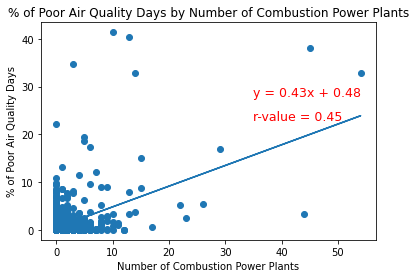

In [66]:
#Plotting

x_values = mergedaqippdf["num_combustible"]
y_values = mergedaqippdf["% Poor Air Quality"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(35,28),fontsize=12.5,color="red")
plt.annotate(rvalue_string, (35,23), fontsize = 12.5, color = "red")
plt.xlabel("Number of Combustion Power Plants")
plt.ylabel("% of Poor Air Quality Days")
plt.title("% of Poor Air Quality Days by Number of Combustion Power Plants")
print(f"The r-value for this is {rvalue}")

plt.savefig("C:/Users/emanu/repos/Data Project Github/World-Power/Output/Images/PercentPoorAQIbyCombustible.png", bbox_inches = "tight")

plt.show


In [67]:
#Determing outliers
quartiles = mergedaqippdf["num_combustible"].quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_df = mergedaqippdf.loc[(mergedaqippdf["num_combustible"] < lower_bound) | (mergedaqippdf["num_combustible"] > upper_bound)]

outliers_df
#print(outliers_df["State"])
#print(f"The upper bound is {upper_bound}")

,State,County,"County, State",Year,Days with AQI,% Poor Air Quality,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,...,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other,num_combustible
30,Arizona,Maricopa,"Maricopa County, Arizona",2017,365,15.068493,51,259,50,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,15.0
49,California,Alameda,"Alameda County, California",2017,365,3.835616,189,162,9,4,...,3.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0
54,California,Contra Costa,"Contra Costa County, California",2017,365,3.287671,222,131,8,4,...,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,13.0
57,California,Fresno,"Fresno County, California",2017,365,32.876712,102,143,93,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
62,California,Kern,"Kern County, California",2017,365,38.082192,76,150,115,24,...,11.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,45.0
65,California,Los Angeles,"Los Angeles County, California",2017,365,32.876712,38,207,74,38,...,1.0,0.0,3.0,5.0,4.0,0.0,0.0,0.0,0.0,54.0
72,California,Monterey,"Monterey County, California",2017,365,0.273973,304,60,1,0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
75,California,Orange,"Orange County, California",2017,365,8.767123,147,186,30,2,...,0.0,0.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,15.0
78,California,Riverside,"Riverside County, California",2017,365,41.369863,52,162,100,43,...,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
81,California,San Bernardino,"San Bernardino County, California",2017,365,40.273973,31,187,73,51,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0


In [68]:
#Removing the Outliers
mergedaqippdf = mergedaqippdf.loc[(mergedaqippdf["num_combustible"] < upper_bound) & (mergedaqippdf["num_combustible"] > lower_bound)]
mergedaqippdf

,State,County,"County, State",Year,Days with AQI,% Poor Air Quality,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,...,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other,num_combustible
2,Alabama,Colbert,"Colbert County, Alabama",2017,283,0.000000,265,18,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Alabama,DeKalb,"DeKalb County, Alabama",2017,359,0.000000,329,30,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alabama,Elmore,"Elmore County, Alabama",2017,226,0.000000,221,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Alabama,Etowah,"Etowah County, Alabama",2017,360,0.555556,233,125,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,Alabama,Houston,"Houston County, Alabama",2017,281,0.355872,260,20,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,Wyoming,Platte,"Platte County, Wyoming",2017,60,0.000000,54,6,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1023,Wyoming,Sheridan,"Sheridan County, Wyoming",2017,365,1.095890,259,102,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1025,Wyoming,Sweetwater,"Sweetwater County, Wyoming",2017,365,1.369863,260,100,2,2,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
1026,Wyoming,Teton,"Teton County, Wyoming",2017,365,0.273973,299,65,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


The r-value for this is 0.04817690425986446


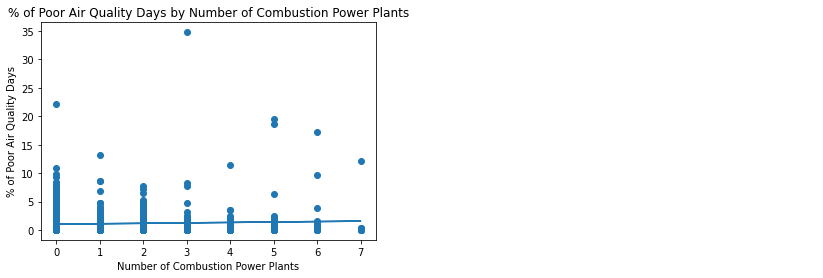

In [69]:

x_values_no_outs = mergedaqippdf["num_combustible"]
y_values_no_outs = mergedaqippdf["% Poor Air Quality"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_no_outs, y_values_no_outs)
regress_values_no_outs = x_values_no_outs * slope + intercept

line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values_no_outs, y_values_no_outs)
plt.plot(x_values_no_outs,regress_values_no_outs)
plt.xlabel("Number of Combustion Power Plants")
plt.ylabel("% of Poor Air Quality Days")

plt.title("% of Poor Air Quality Days by Number of Combustion Power Plants")

plt.annotate(line_eq,(15,10.75),fontsize=12.5,color="red")
plt.annotate(rvalue_string, (15, 9.75), fontsize = 12.5, color = "red")

plt.savefig("C:/Users/emanu/repos/Data Project Github/World-Power/Output/Images/PercentPoorAQIbyCombustiblewithnooutliers.png", bbox_inches = "tight")

plt.show
print(f"The r-value for this is {rvalue}")

In [70]:
#bringing population data(household) into analysis

ppbycounty_income = "C:/Users/emanu/repos/Data Project Github/World-Power/Output/powerplants_and_income_by_county.csv"

ppbycountyincdf = pd.read_csv(ppbycounty_income)

ppbycountyincdf.head()

,Unnamed: 0,County,num_solar,num_gas,num_oil,num_hydro,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other,Total Households,Median Income,Total Powerplants
0,0,"Rockland County, New York",2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100167.0,88726.0,8.0
1,1,"Mercer County, New Jersey",13.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,128757.0,79173.0,19.0
2,2,"Norfolk County, Massachusetts",14.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,263862.0,100829.0,23.0
3,3,"Los Angeles County, California",113.0,49.0,2.0,19.0,1.0,0.0,3.0,5.0,4.0,0.0,0.0,0.0,0.0,3311231.0,65006.0,196.0
4,4,"Middlesex County, New Jersey",41.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285446.0,85337.0,49.0


In [71]:
#renaming new df column
ppbycountyincdf = ppbycountyincdf.rename(columns={"County": "County, State"})

ppbycountyincdf.head()

,Unnamed: 0,"County, State",num_solar,num_gas,num_oil,num_hydro,num_wind,num_coal,num_biomass,num_storage,num_cogeneration,num_geothermal,num_petcoke,num_nuclear,num_other,Total Households,Median Income,Total Powerplants
0,0,"Rockland County, New York",2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100167.0,88726.0,8.0
1,1,"Mercer County, New Jersey",13.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,128757.0,79173.0,19.0
2,2,"Norfolk County, Massachusetts",14.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,263862.0,100829.0,23.0
3,3,"Los Angeles County, California",113.0,49.0,2.0,19.0,1.0,0.0,3.0,5.0,4.0,0.0,0.0,0.0,0.0,3311231.0,65006.0,196.0
4,4,"Middlesex County, New Jersey",41.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285446.0,85337.0,49.0


In [72]:
#merging tables for population/household data to be included into plot

merged_ppbycountyincdf = pd.merge(mergedaqippdf,ppbycountyincdf, on="County, State", how="left")

merged_ppbycountyincdf=merged_ppbycountyincdf.dropna()

merged_ppbycountyincdf.head()

,State,County,"County, State",Year,Days with AQI,% Poor Air Quality,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,...,num_biomass_y,num_storage_y,num_cogeneration_y,num_geothermal_y,num_petcoke_y,num_nuclear_y,num_other_y,Total Households,Median Income,Total Powerplants
1,Alabama,DeKalb,"DeKalb County, Alabama",2017,359,0.000000,329,30,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25848.0,39373.0,0.0
2,Alabama,Elmore,"Elmore County, Alabama",2017,226,0.000000,221,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29176.0,60558.0,4.0
3,Alabama,Etowah,"Etowah County, Alabama",2017,360,0.555556,233,125,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37091.0,41576.0,1.0
4,Alabama,Houston,"Houston County, Alabama",2017,281,0.355872,260,20,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39106.0,44529.0,2.0
5,Alabama,Jefferson,"Jefferson County, Alabama",2017,365,0.821918,179,183,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,259324.0,50709.0,3.0


The r-value for this is 0.08815259867647574


<function matplotlib.pyplot.show(*args, **kw)>

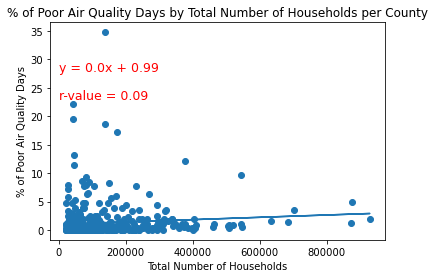

In [73]:
#plotting merged data with population


x_values = merged_ppbycountyincdf["Total Households"]
y_values = merged_ppbycountyincdf["% Poor Air Quality"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
rvalue_string = f"r-value = {str(round(rvalue,2))}"

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values)
plt.annotate(line_eq,(35,28),fontsize=12.5,color="red")
plt.annotate(rvalue_string, (35,23), fontsize = 12.5, color = "red")
plt.xlabel("Total Number of Households")
plt.ylabel("% of Poor Air Quality Days")
plt.title("% of Poor Air Quality Days by Total Number of Households per County")
print(f"The r-value for this is {rvalue}")

plt.savefig("C:/Users/emanu/repos/Data Project Github/World-Power/Output/Images/AQIvsHousehold.png", bbox_inches = "tight")

plt.show